In [14]:
# Load Data
import pandas as pd
df = pd.read_csv("../data/processed/kredit_jp_op_features.csv")
df.head()

,provinsi,modal_kerja,investasi,konsumsi,Ekspor,Impor,Lainnya
0,Jawa Barat,2.077176e+05,9.672522e+04,319016.697111,5092.471822,3127.058260,6.152400e+05
1,Banten,6.462295e+04,3.573056e+04,110653.139295,885.777350,317.475168,2.098034e+05
2,DKI Jakarta,1.909829e+06,1.390056e+06,653120.811648,126670.070327,80833.718683,3.745502e+06
3,D.I Yogyakarta,1.946274e+04,1.847666e+04,17451.776623,368.597205,95.020426,5.492756e+04
4,Jawa Tengah,2.036505e+05,7.179335e+04,111966.040818,5601.950776,1170.455010,3.806375e+05


In [15]:
# Cek Missing Values & Info
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   provinsi     34 non-null     object 
 1   modal_kerja  34 non-null     float64
 2   investasi    34 non-null     float64
 3   konsumsi     34 non-null     float64
 4   Ekspor       34 non-null     float64
 5   Impor        34 non-null     float64
 6   Lainnya      34 non-null     float64
dtypes: float64(6), object(1)
memory usage: 2.0+ KB


provinsi       0
modal_kerja    0
investasi      0
konsumsi       0
Ekspor         0
Impor          0
Lainnya        0
dtype: int64

In [23]:
# Statistik Deskriptif
df.describe()


,modal_kerja,investasi,konsumsi,Ekspor,Impor,Lainnya
count,3.400000e+01,3.400000e+01,34.000000,34.000000,34.000000,3.400000e+01
mean,1.010767e+05,6.575345e+04,63331.458383,5571.184925,3449.699850,2.211407e+05
std,3.268131e+05,2.358345e+05,120539.168937,21666.389509,14185.199626,6.392061e+05
min,3.076715e+03,1.321865e+03,1328.471676,0.953588,0.877243,1.234085e+04
25%,1.133600e+04,6.530967e+03,18036.188648,281.595456,28.619824,4.124670e+04
50%,2.121533e+04,1.584016e+04,28077.505273,576.792326,70.639775,6.094968e+04
75%,4.037444e+04,3.349329e+04,38634.718288,1003.108533,312.101559,1.145485e+05
max,1.909829e+06,1.390056e+06,653120.811648,126670.070327,80833.718683,3.745502e+06


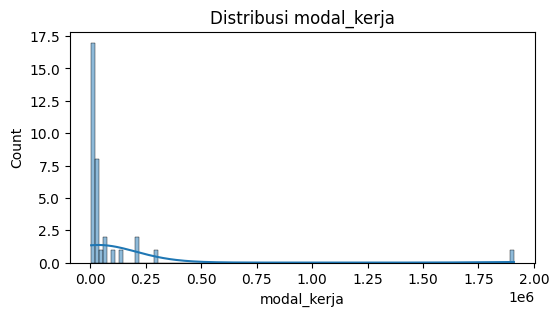

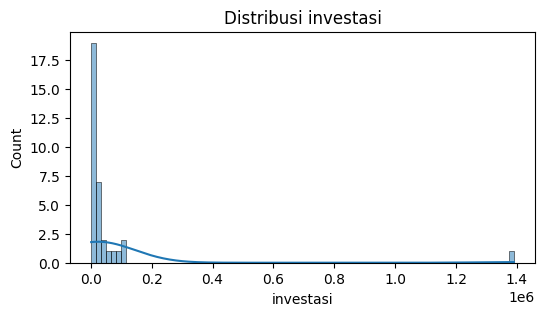

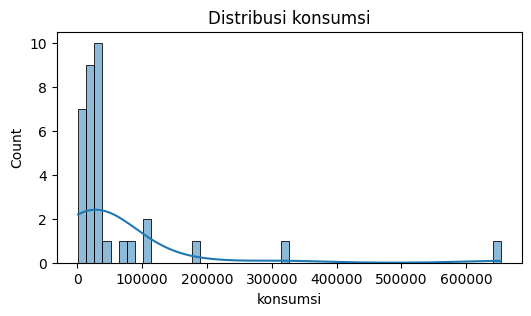

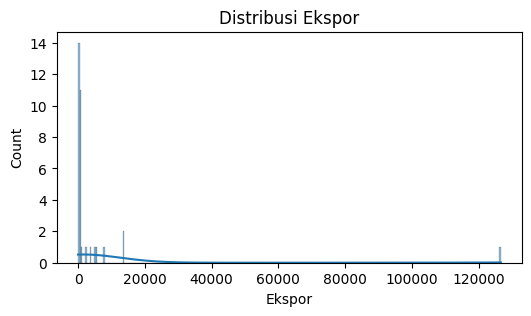

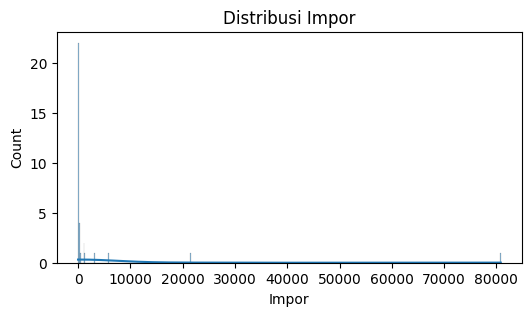

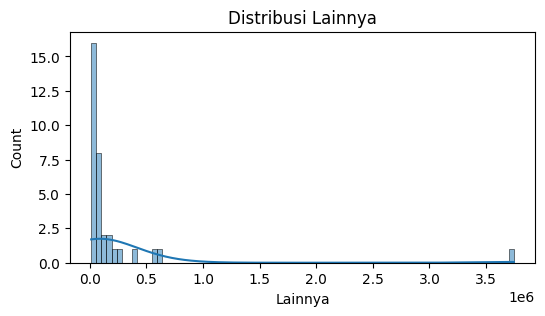

In [17]:
# Distrbusi Setiap Fitur
import matplotlib.pyplot as plt
import seaborn as sns

for col in df.columns[1:]:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi {col}')
    plt.show()


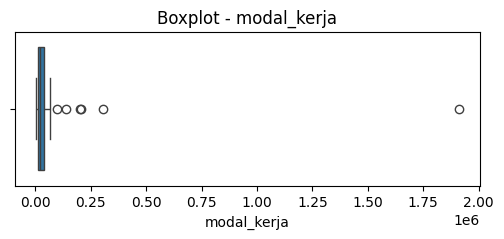

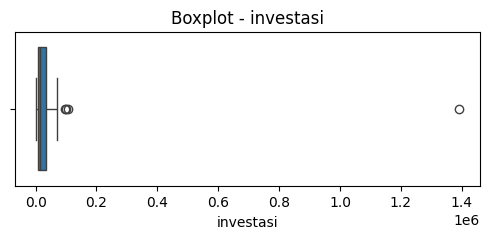

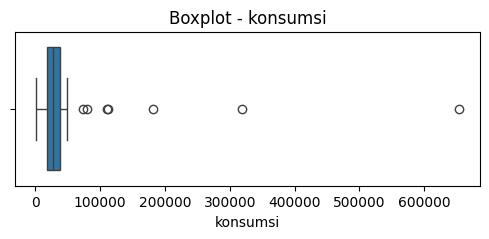

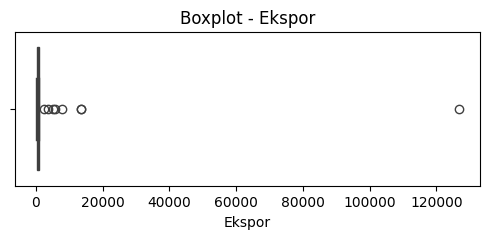

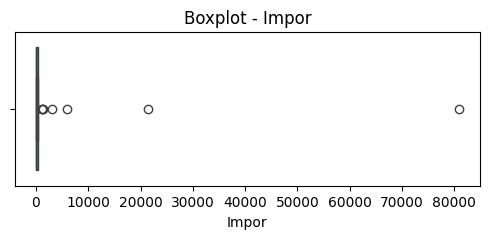

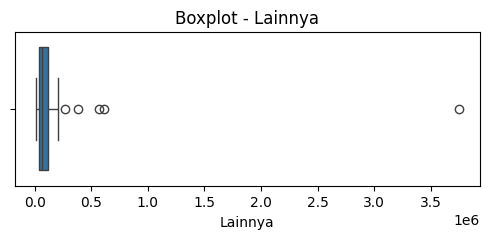

In [18]:
# Boxplot outlier check
for col in df.columns[1:]:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot - {col}')
    plt.show()


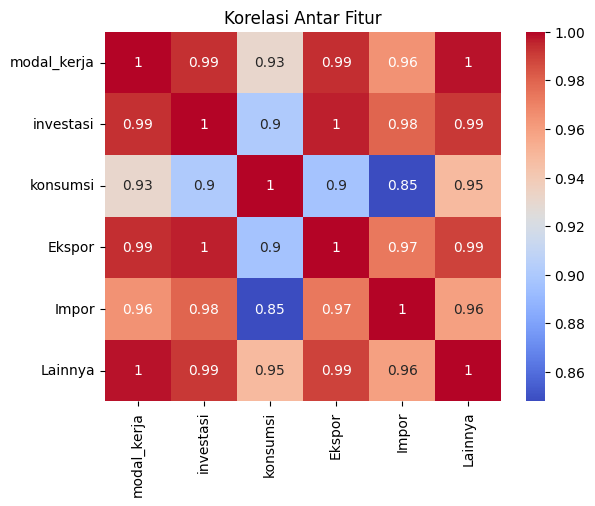

In [19]:
# Korelasi antar fitur
sns.heatmap(df.iloc[:, 1:].corr(), annot=True, cmap="coolwarm")
plt.title("Korelasi Antar Fitur")
plt.show()


In [25]:
# Cek provinsi yang merupakan outlier
from scipy.stats import zscore
df_num = df.drop(columns=["provinsi"])
z_scores = zscore(df_num)
z_df = pd.DataFrame(z_scores, columns=df_num.columns)

# Tandai baris outlier jika ada satu saja kolom yang z-score > 2
outliers = (z_df.abs() > 2).any(axis=1)

# Gabungkan dengan provinsi
df_outlier = df[outliers]

print(df_outlier[["provinsi"] + list(df_num.columns)])


      provinsi   modal_kerja     investasi       konsumsi         Ekspor  \
0   Jawa Barat  2.077176e+05  9.672522e+04  319016.697111    5092.471822   
2  DKI Jakarta  1.909829e+06  1.390056e+06  653120.811648  126670.070327   

          Impor       Lainnya  
0   3127.058260  6.152400e+05  
2  80833.718683  3.745502e+06  
